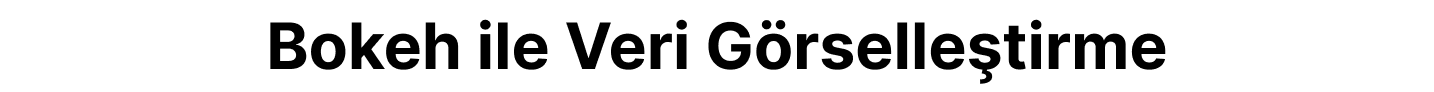

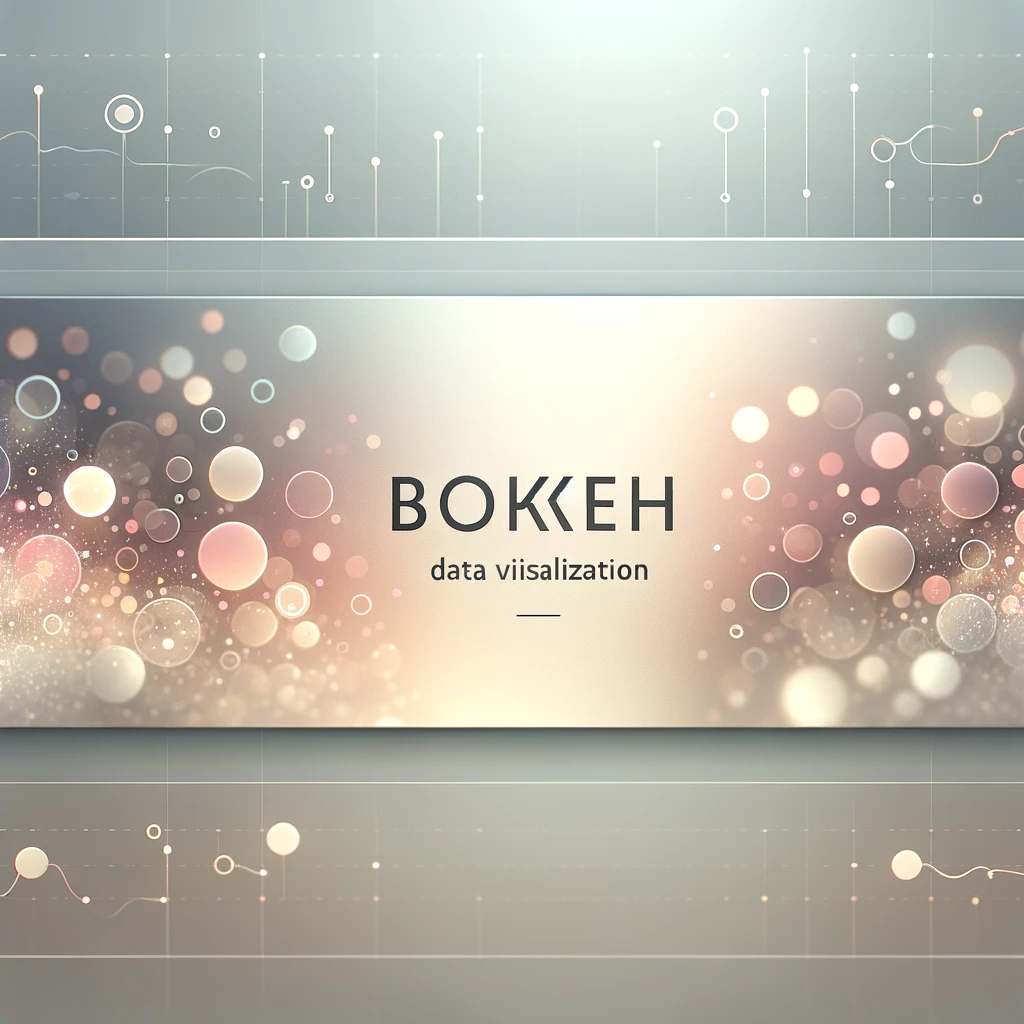

Katkılarından dolayı hocamın Mustafa Erdogan'a teşekkür ederiz.

KAYNAK:https://medium.com/academy-team/pythonda-i%CC%87nteraktif-veri-g%C3%B6rselle%C5%9Ftirme-bokeh-36775af00bd1

In [1]:
!pip install bokeh

### -  Line Plot çizimi

In [2]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Jupyter Notebook için çıktıyı ayarlar
output_notebook()

# Veri oluşturma
x = [2, 4, 6, 8, 10]
y = [12, 14, 4, 16, 18]

# Bokeh için bir figure (şekil) oluşturur
p = figure(title='Basit Bir Cizgi Grafigi', x_axis_label='X', y_axis_label='Y')

# Çizgi grafiğini oluşturur
p.line(x, y, legend_label='Cizgi', line_width=2)

# Grafiği gösterir
show(p)

Loading BokehJS ...

### -  Scatter Grafiği Çizimi

Şimdi, Bokeh kütüphanesini kullanarak basit bir scatter plot grafiği oluşturalım. Oluşan bu scatter grafiğinde grafiği özellşetimek için bazı parametrelerde kullanılmıştır.

In [3]:
# figure ölçülerini kullanarak yeni bir çizim oluşturur
p = figure(width=400, height=400)

# Grafik dışındaki yapılan özelleştirmeler
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "red"

# Veri oluşturma
x = [2, 4, 6, 8, 10]
y = [12, 8, 4, 16, 18]

# Scatter grafiğini oluşturur
r = p.circle(x, y, size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)

# Grafiği gösterir
show(p)

Scatter grafiğini dilerseniz daireler ile değil kareler kullanaraktan yapabilirsiniz.

In [4]:
# figure ölçülerini kullanarak yeni bir çizim oluştur
p = figure(width=500, height=500)

# Grafik dışındaki yapılan özelleştirmeler
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "purple"

# Veri oluşturma
x = [2, 4, 6, 8, 10]
y = [12, 8, 4, 16, 18]
# Scatter Plot grafiğini oluştur opsiyonel olarak size, color, alpha gir
p.square(x, y, size=[10, 15, 20, 25, 30], line_color="black", color="green", alpha=0.9)

# Grafiği gösterir
show(p)

### -  Grafik Üzerinde Stil ve Düzenleme Yapma
Bokeh, grafiğinizi özelleştirmek için birçok seçenek sunmaktadır. Örneğin, akses etiketlerini, başlığı, çizgi kalınlığını ve renklerini ayarlayabilirsiniz.

In [5]:
# Veri oluşturma
x = [2, 4, 6, 8, 10]
y = [12, 14, 4, 16, 18]

# Çizgi grafiğini oluşturur
p.line(x, y, legend_label='Cizgi', line_width=6, line_color = 'red')

p.title.text = 'Yeni Baslık'
p.xaxis.axis_label = 'Yeni X Ekseni Etiketi'
p.yaxis.axis_label = 'Yeni Y Ekseni Etiketi'

# Grafiği gösterir
show(p)

### -  Hexbin Grafiği

Hexbin grafiği, özellikle büyük veri kümelerinde noktaların yoğunluğunu görselleştirmek için tercih edilmektedir. Grafikteki altıgen hücrelerin sayısı, veri noktalarının nasıl dağıldığını gösterirken, daha fazla altıgen hücre, daha yoğun bir dağılımı temsil etmekte, daha az altıgen hücre, daha seyrek bir dağılımı temsil etmektedir. Yoğunluğu daha yüksek olan bölgeler daha koyu renklerle temsil edilirken, düşük yoğunluklu bölgeler daha açık renklerle temsil edilmektedir.

In [8]:
import numpy as np 
from bokeh.palettes import Viridis256
from bokeh.util.hex import hexbin

# Veri oluşturun
# n (50000) adet normal dağılıma sahip rastgele x ve y noktaları oluşturulması
n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

# Hexbin oluşturma ve altıgen hücre kenar uzunluğu tanımlanması
bins = hexbin(x, y, 0.1)

# bins.counts ile her bir altıgen hücredeki nokta sayısını elde ederiz. 
# Bu sayıları normalize ederek (maksimum nokta sayısına bölerek) 0-255 aralığına getiririz.
# Daha sonra bu değerlere karşılık gelen renkleri Viridis256 renk paletinden seçeriz.
color = [Viridis256[int(i)] for i in bins.counts/max(bins.counts)*255]

# Bokeh grafiği oluşturulması
p = figure(tools="wheel_zoom,reset", match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

# Hexbin grafiğinin çizilmesi
p.hex_tile(bins.q, bins.r, size=0.1, line_color=None, fill_color=color)

# Grafiği göster
show(p)

### -  image & image_rgba Grafikleri

Bu fonksiyonlarla oluşturulan grafikler ısı haritaları ile benzer şekilde yorumlanmaktadır.

image fonksiyonu ile oluşturulan görseller tek bir renk paleti kullanarak gri tonlamalı bir görüntü oluşturur ve her pikselin değeri renk paleti aracılığıyla bir renge dönüştürülerek görselleştirilebilir.

image_rgba fonksiyonu ile RGB(A) (Kırmızı, Yeşil, Mavi, Alfa) piksel renkleri kullanılarak görselleştirilmektedir. Bu fonksiyon, piksellerin renk değerlerinin doğrudan belirtmesini sağlamaktadır. Bu sayede, renk paleti kullanma zorunluluğu olmadan, daha özelleştirilmiş grafikler tasarlanabilmektedir.

In [9]:
# Veri oluşturun
# 0 ile 10 arasında, N adet nokta oluşturan bir x ve y dizisi oluşturun
N = 500
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)

# x ve y dizilerini kullanarak 2D bir ızgara oluşturuyorsunuz.
# xx ve yy matrisleri, her noktanın koordinatlarını içerecektir.
xx, yy = np.meshgrid(x, y)

# np.sin(xx) ve np.cos(yy) işlemlerini kullanarak img adında bir görüntü matrisi oluşturuyorsunuz.
# Bu matris, xx ve yy koordinatlarının sinüs ve kosinüs fonksiyonlarına göre hesaplanan değerlerini içerecektir.
img = np.sin(xx)*np.cos(yy)

# Figure fonksiyonunu kullanarak bir çizim alanı (p) oluşturuyorsunuz.
# x_range ve y_range parametreleri ile x ve y eksenlerinin aralığını belirliyorsunuz.
p = figure(x_range=(0, 10), y_range=(0, 10))

# image fonksiyonunu kullanarak çizim alanına bir görüntü ekliyoruz.
# image parametresi olarak img matrisini veriyorsunuz.
# x ve y parametreleri ile görüntünün başlangıç noktasını belirliyorsunuz.
# dw ve dh parametreleri ile görüntünün genişlik ve yüksekliğini ayarlıyorsunuz. 
# Palette parametresi, görüntünün renk paletini belirler.
p.image(image=[img], x=0, y=0, dw=10, dh=10, palette="Spectral11")

# Grafiği göster
show(p)

In [10]:
from __future__ import division

# N değişkenine 20 değerini atıyorsunuz.
# Bu, görüntünün boyutunu belirleyen bir parametredir.
# Görüntü 20x20 piksel boyutunda olacak. 
N = 20

# img adında bir Numpy dizisi oluşturuyorsunuz. 
# Bu dizi, N x N boyutunda bir görüntüyü temsil eder.
# dtype=np.uint32 parametresi
# Her pikselin RGBA değerlerini 32 bitlik tamsayı olarak tutacağını belirtir.
img = np.empty((N,N), dtype=np.uint32) 

# view adında yeni bir dizi oluşturuyorsunuz. 
# Bu dizi, img dizisine bir görünüm sağlar
# Her bir pikselin RGBA kanallarına ayrı ayrı erişimi mümkün kılar.
# dtype=np.uint8 parametresi 
# Her RGBA kanalının 8 bitlik tamsayı olarak tutulacağını belirtir.
view = img.view(dtype=np.uint8).reshape((N, N, 4))

# for döngüsü kullanarak, her piksele bir RGBA değeri atıyorsunuz.
# Bu değerler pikselin rengini belirler.
# Kırmızı kanal (R) pikselin yatay pozisyonuna bağlı olarak değişir
# Yeşil kanal (G) 158 olarak sabitlenir
# Mavi kanal (B) pikselin dikey pozisyonuna bağlı olarak değişir.
# Alpha kanalı (A) ise tamamen opaktır ve değeri 255'tir.
for i in range(N):
    for j in range(N):
        view[i, j, 0] = int(i/N*255) # red
        view[i, j, 1] = 158          # green
        view[i, j, 2] = int(j/N*255) # blue
        view[i, j, 3] = 255          # alpha
        
# bir çizim alanı (figure) oluşturuyoruz.
# x_range ve y_range parametreleri, çizim alanının x ve y eksenlerinin aralığını belirler.
p = figure(x_range=[0,10], y_range=[0,10])

# image_rgba fonksiyonunu kullanarak çizim alanına bir RGBA görüntü ekliyoruz.
p.image_rgba(image=[img], x=[0], y=[0], dw=[10], dh=[10])

# Grafiği göster
show(p)

# Etkileşimli (İnteraktif) Grafikler
Bokeh kütüphanesi, grafiklerin özelleştirilmesine ve grafiklerin interaktif şekilde görülmesine olanak tanır. Ayrıca, eksenlerin özelleştirilmesi ve arka plana görsel ekleme gibi daha gelişmiş özelleştirmelere fırsat vermektedir.

### -  Glyph

Glyph’ler, Bokeh kütüphanesindeki çizim araçları ve plot objeleriyle birlikte kullanılmaktadır. Çizim alanına eklenen bir veya daha fazla Glyph, veri setinin görselleştirilmesine ve kullanıcıların veriyi etkileşimli olarak keşfetmelerine olanak tanımaktadır.